In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os

In [76]:
data_path = "/data2/cehou/LLM_safety/img_text_data/mapping/crime.pkl"
GSV_metadata = pd.read_pickle("/data_nas/GoogleSV/metadata/China/HongKong/pano_2024-08-17 13:11:09.125553_23512.p")
data = pd.read_pickle(data_path)

In [78]:
import shutil
for age in ['30']:
    for gender in ['male', 'female']:
        sorted_data = data[(data['gender'] == gender) & (data['age'] == age)].sort_values(by='Score')
        target_dir = f"/data2/cehou/LLM_safety/img_text_data/mapping/shp_files/crime_{age}_{gender}/example_SVIs"
        for i in range(10):
            panoid = sorted_data.iloc[i]['panoid']
            for angle in ['0', '90', '180', '270']:
                img_path = f"/data2/cehou/LLM_safety/GSV/HK_imgs/{panoid[0]}/{panoid[1]}/{panoid}_{angle}.jpg"
                os.makedirs(f"{target_dir}/low_score", exist_ok=True)
                target_path = os.path.join(target_dir, 'low_score', os.path.basename(img_path))
                if os.path.exists(img_path):
                    shutil.copy(img_path, target_path)

        for i in range(10):
            panoid = sorted_data.iloc[-i]['panoid']
            for angle in ['0', '90', '180', '270']:
                img_path = f"/data2/cehou/LLM_safety/GSV/HK_imgs/{panoid[0]}/{panoid[1]}/{panoid}_{angle}.jpg"
                os.makedirs(f"{target_dir}/high_score", exist_ok=True)
                target_path = os.path.join(target_dir, "high_score", os.path.basename(img_path))
                if os.path.exists(img_path):
                    shutil.copy(img_path, target_path)
                    
        for i in range(10):
            panoid = sorted_data.iloc[int(len(sorted_data)/4)-5+i]['panoid']
            for angle in ['0', '90', '180', '270']:
                img_path = f"/data2/cehou/LLM_safety/GSV/HK_imgs/{panoid[0]}/{panoid[1]}/{panoid}_{angle}.jpg"
                os.makedirs(f"{target_dir}/left_quarter", exist_ok=True)
                target_path = os.path.join(target_dir, "left_quarter", os.path.basename(img_path))
                if os.path.exists(img_path):
                    shutil.copy(img_path, target_path)

        for i in range(10):
            panoid = sorted_data.iloc[int(3*len(sorted_data)/4)-5+i]['panoid']
            for angle in ['0', '90', '180', '270']:
                img_path = f"/data2/cehou/LLM_safety/GSV/HK_imgs/{panoid[0]}/{panoid[1]}/{panoid}_{angle}.jpg"
                os.makedirs(f"{target_dir}/right_quarter", exist_ok=True)
                target_path = os.path.join(target_dir, "right_quarter", os.path.basename(img_path))
                if os.path.exists(img_path):
                    shutil.copy(img_path, target_path)

In [ ]:
import shutil

# 需要压缩的目录路径
dir_to_compress = "/data2/cehou/LLM_safety/img_text_data/mapping"

# 压缩包的输出路径和名称
output_filename = "/data2/cehou/LLM_safety/img_text_data/mapping/mapping_archive"

# 创建压缩包
shutil.make_archive(output_filename, 'zip', dir_to_compress)

In [33]:
for age in ['30']:
    for gender in ['male', 'female']:
        selected_data = data[(data['gender'] == gender) & (data['age'] == age)][['panoid', 'age', 'gender', 'location', 'event','Score']]
        merged_data = GSV_metadata[['panoid','lat','lon']].merge(selected_data, on='panoid', how='left')
        merged_data_gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data.lon, merged_data.lat))
        merged_data_gdf.set_crs(epsg=4326, inplace=True)
        os.makedirs(f"/data2/cehou/LLM_safety/img_text_data/mapping/shp_files/crime_{age}_{gender}", exist_ok=True)
        merged_data_gdf.to_file(f"/data2/cehou/LLM_safety/img_text_data/mapping/shp_files/crime_{age}_{gender}/crime_{age}_{gender}.shp")

In [38]:
merged_data_gdf[(data['gender'] == 'male') & (data['age'] == '30')]

,panoid,lat,lon,age,gender,location,event,Score,geometry
0,KtHXnMKIroDc_BK-EePEww,22.310002,114.171100,NaN,NaN,NaN,NaN,NaN,POINT (114.17110 22.31000)
1,uaWZV0lCAQRN4qCbvBy-uQ,22.310017,114.171079,NaN,NaN,NaN,NaN,NaN,POINT (114.17108 22.31002)
2,z39LXK-I0_FXEzPSFD4QUQ,22.309992,114.171083,NaN,NaN,NaN,NaN,NaN,POINT (114.17108 22.30999)
3,iN2ZLjRQCcddBoZLzXwRWA,22.309993,114.171079,30,female,HongKong,theft or harassment,5.641222,POINT (114.17108 22.30999)
4,ZU_JDaoWqgp1wFT9Z_WB5Q,22.310023,114.171109,NaN,NaN,NaN,NaN,NaN,POINT (114.17111 22.31002)
...,...,...,...,...,...,...,...,...,...
683191,WbJQrhfs_OiojpcIkf_YbA,22.434206,114.024910,NaN,NaN,NaN,NaN,NaN,POINT (114.02491 22.43421)
683192,QyXxNVkfd4j8ampaLEYIyg,22.434200,114.024810,NaN,NaN,NaN,NaN,NaN,POINT (114.02481 22.43420)
683193,EEshehKUF9nHwvYKQfjwuA,22.434916,114.025036,NaN,NaN,NaN,NaN,NaN,POINT (114.02504 22.43492)
683194,AktfR4y5OH5ve5fbGwwnOg,22.434748,114.025051,NaN,NaN,NaN,NaN,NaN,POINT (114.02505 22.43475)


<Axes: >

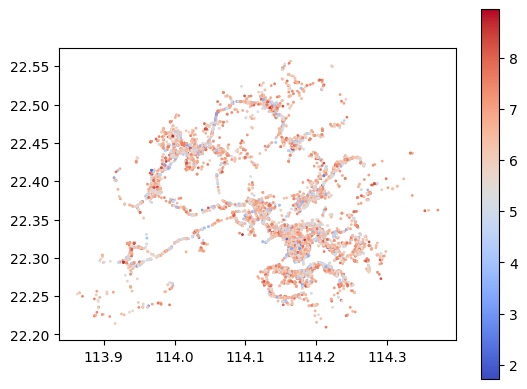

In [43]:
merged_data_gdf.plot(column='Score', cmap='coolwarm', markersize=1, legend=True)